Algoritmo de clasificación supervisada Knn

In [19]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
import joblib

In [25]:
# cargar los datos desde un archivo CSV
datos = pd.read_csv('./Datasets/frames_erosion.csv')

In [27]:
# separar los datos en características y etiquetas
X = datos.drop('clase', axis=1)
y = datos['clase']

In [43]:
# dividir los datos en conjuntos de entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.3, random_state=15)
print(len(X_entrenamiento))

5894


In [36]:
## graficar las muestras de iris setosa
#setosa = X_entrenamiento[y_entrenamiento=='Iris-setosa']
#plt.scatter(setosa['SepalLengthCm'], setosa['SepalWidthCm'], c='r', marker='o', label='Iris-setosa')
#
## graficar las muestras de iris versicolor
#versicolor = X_entrenamiento[y_entrenamiento=='Iris-versicolor']
#plt.scatter(versicolor['SepalLengthCm'], versicolor['SepalWidthCm'], c='g', marker='^', label='Iris-versicolor')
#
## graficar las muestras de iris virginica
#virginica = X_entrenamiento[y_entrenamiento=='Iris-virginica']
#plt.scatter(virginica['SepalLengthCm'], virginica['SepalWidthCm'], c='b', marker='s', label='Iris-virginica')
#
## configurar los títulos y etiquetas de los ejes
#plt.title('Datos de Entrenamiento')
#plt.xlabel('Longitud del Sépalo (cm)')
#plt.ylabel('Ancho del Sépalo (cm)')
#
## mostrar la leyenda y la gráfica
#plt.legend()
#plt.show()

In [50]:
# crear y entrenar un modelo KNN con k=3, p=2 (distancia euclidiana), 
modelo = KNeighborsClassifier(n_neighbors=2, algorithm="auto",metric="minkowski", p=2)
modelo.fit(X_entrenamiento, y_entrenamiento)
# indicamos que los objetos de entrada no tendran una clase preasignada
modelo.feature_names_in_ = None
joblib.dump(modelo, './modelos/modelo_autonomo_knn.joblib')

['./modelos/modelo_autonomo_knn.joblib']

In [54]:
X_prueba

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x1143,x1144,x1145,x1146,x1147,x1148,x1149,x1150,x1151,x1152
6185,0,0,0,0,0,0,0,0,255,255,...,0,0,0,0,0,0,0,0,255,255
6912,0,0,0,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,255
3975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6809,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,255
3166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8072,255,255,255,0,0,0,0,0,0,0,...,0,0,0,0,0,255,255,255,255,255
368,0,0,0,0,0,0,0,0,0,0,...,0,255,255,255,255,255,255,255,255,255
8153,255,255,255,255,255,255,255,0,0,0,...,0,0,0,0,0,255,255,255,255,255
5596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# hacer predicciones en los datos de prueba
predicciones = modelo.predict(X_prueba)

In [60]:
# calcular la precisión del modelo
precision = accuracy_score(y_prueba, predicciones)

print("Precisión del modelo:", precision)

Precisión del modelo: 0.996438464582509


In [63]:
#generar la matriz confusión
confusion_matrix = metrics.confusion_matrix(y_prueba, 
                                                predicciones)

confusion_matrix

array([[854,   0,   0],
       [  0, 840,   2],
       [  2,   5, 824]], dtype=int64)

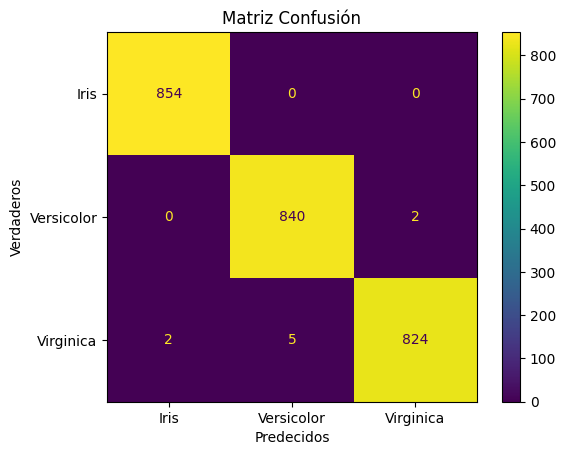

In [58]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Iris','Versicolor','Virginica'])

cm_display.plot()
plt.title("Matriz Confusión")
plt.xlabel("Predecidos")
plt.ylabel("Verdaderos")
plt.show()

In [45]:
#Obtener verdaderos de la matriz confusión
verdaderos = int(confusion_matrix[[0],[0]] + confusion_matrix[[1],[1]] + confusion_matrix[[2],[2]])
verdaderos

#Obtener falsos de la matriz confusión
falsos = int(confusion_matrix[[0],[1]] + confusion_matrix[[0],[2]] + confusion_matrix[[1],[0]] + confusion_matrix[[1],[2]] + confusion_matrix[[2],[0]] + confusion_matrix[[2],[1]])
falsos

exactitud = verdaderos / (verdaderos+falsos) * 100
print(f'El modelo tiene un porcentaje de exactitud de: {exactitud}%')

El modelo tiene un porcentaje de exactitud de: 99.64384645825089%


In [44]:
verdaderos_izq = int(confusion_matrix[[0],[0]])
falsos_izq = int(confusion_matrix[[0],[1]] + confusion_matrix[[0],[2]])
sensibilidad_izq = verdaderos_izq / (falsos_izq + verdaderos_izq) * 100

print(f'El modelo tiene un porcentaje de sensibilidad sobre Iris de: {sensibilidad_izq}%')

verdaderos_cent = int(confusion_matrix[[1],[1]])
falsos_cent = int(confusion_matrix[[1],[0]] + confusion_matrix[[1],[2]])
sensibilidad_cent = verdaderos_cent / (falsos_cent + verdaderos_cent) * 100

print(f'El modelo tiene un porcentaje de sensibilidad sobre Versicolor de: {sensibilidad_cent}%')

verdaderos_der = int(confusion_matrix[[2],[2]])
falsos_der = int(confusion_matrix[[2],[0]] + confusion_matrix[[2],[1]])
sensibilidad_der = verdaderos_der / (falsos_der + verdaderos_der) * 100

print(f'El modelo tiene un porcentaje de sensibilidad sobre Virginica de: {sensibilidad_der}%')

El modelo tiene un porcentaje de sensibilidad sobre Iris de: 100.0%
El modelo tiene un porcentaje de sensibilidad sobre Versicolor de: 99.7624703087886%
El modelo tiene un porcentaje de sensibilidad sobre Virginica de: 99.15764139590854%
